In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [190]:
# Função para carregar dados simulados
def carregar_dados():
    """
    Função para gerar um conjunto de dados fictício sobre estudo de inglês.
    """
    np.random.seed(50000)

In [191]:

# Gerando dados simulados
tempo_estudo = np.random.normal(loc=3, scale=1, size=1000)  # Tempo de estudo (em horas/dia)
pontuacao = np.random.normal(loc=60, scale=15, size=1000)  # Pontuação no exame
frequencia_palavras = np.random.randint(1, 20, size=1000)  # Frequência de palavras revisadas
niveis = np.random.choice([0, 1, 2, 3, 4], size=1000)  # Níveis: A1=0, A2=1, B1=2, B2=3, C1=4

dados = pd.DataFrame({
    'tempo_estudo': tempo_estudo,
    'pontuacao': pontuacao,
    'frequencia_palavras': frequencia_palavras,
    'nivel': niveis
})

# Retorna os dados gerados
print(dados)



     tempo_estudo  pontuacao  frequencia_palavras  nivel
0        3.102716  62.305747                    4      0
1        2.808815  61.246665                   17      0
2        1.866892  38.962870                    3      2
3        1.681223  82.926334                    4      3
4        2.735088  55.415946                    2      4
..            ...        ...                  ...    ...
995      1.481276  60.748815                   15      1
996      2.875553  75.300058                    4      2
997      3.613703  89.362341                   11      4
998      3.484529  64.426858                    6      2
999      4.005175  66.877209                    4      4

[1000 rows x 4 columns]


In [192]:

# Função de Análise Exploratória de Dados
def analise_exploratoria(dados):
    """
    Função para realizar uma análise exploratória detalhada dos dados.
    """
    print("Primeiras linhas dos dados:")
    print(dados.head())



In [193]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(dados.describe())



Estatísticas Descritivas:
       tempo_estudo    pontuacao  frequencia_palavras        nivel
count   1000.000000  1000.000000          1000.000000  1000.000000
mean       2.973663    59.582829             9.952000     1.944000
std        1.038910    14.939475             5.437395     1.395999
min       -0.174749    13.492225             1.000000     0.000000
25%        2.239243    49.361196             5.000000     1.000000
50%        2.976322    59.262499            10.000000     2.000000
75%        3.659708    69.960200            15.000000     3.000000
max        6.155538   106.517801            19.000000     4.000000


In [194]:
#Verificando a distribuição dos níveis
print("\nDistribuição dos Níveis de Proficiência:")
print(dados['nivel'].value_counts())


Distribuição dos Níveis de Proficiência:
nivel
1    226
3    200
0    198
2    193
4    183
Name: count, dtype: int64


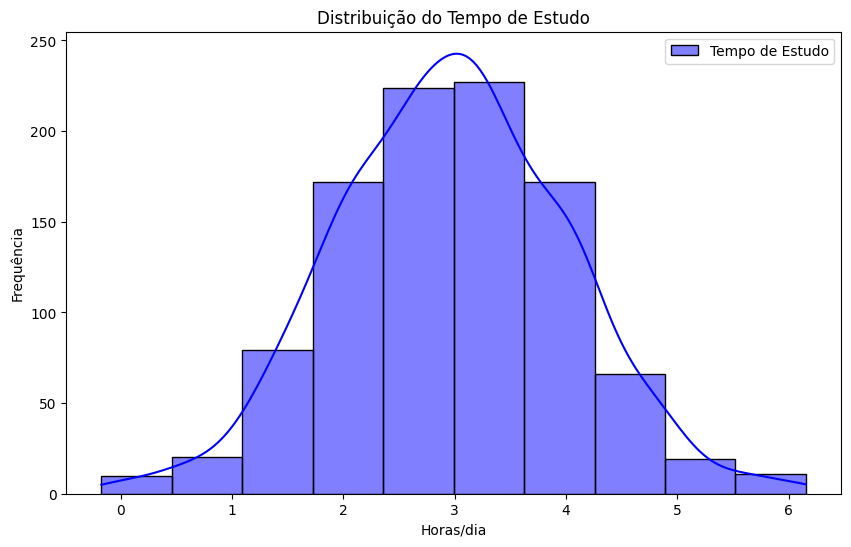

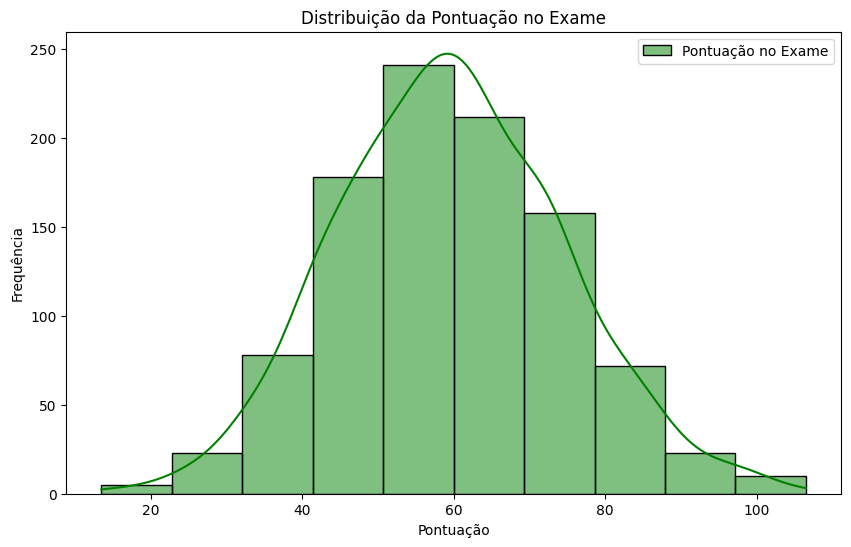

In [195]:
# Visualização da distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(dados['tempo_estudo'], kde=True, color='blue', bins=10, label='Tempo de Estudo')
plt.title('Distribuição do Tempo de Estudo')
plt.xlabel('Horas/dia')
plt.ylabel('Frequência')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(dados['pontuacao'], kde=True, color='green', bins=10, label='Pontuação no Exame')
plt.title('Distribuição da Pontuação no Exame')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.legend()
plt.show()



Correlação entre variáveis:


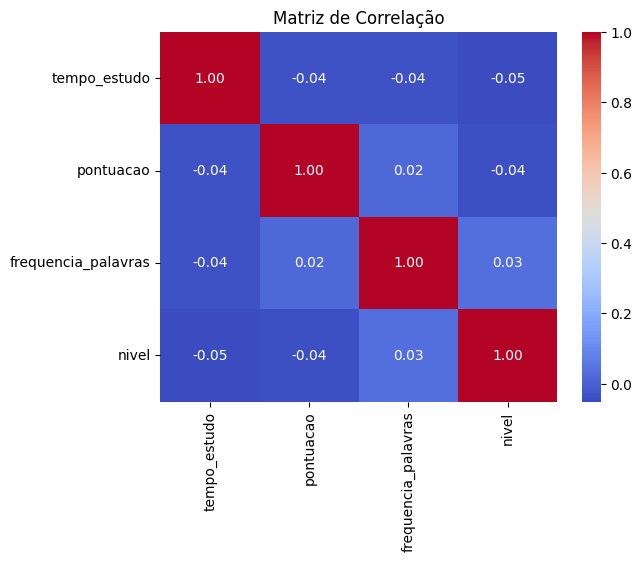

In [196]:
# Correlação entre variáveis
print("\nCorrelação entre variáveis:")
corr = dados.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [197]:
# Função de pré-processamento de dados
def pre_processar_dados(dados):
    """
    Função para tratar valores ausentes, normalizar os dados e separar as variáveis explicativas e alvo.
    """

In [198]:
    # Tratamento de valores ausentes
imputer = SimpleImputer(strategy='mean')  # Preencher valores ausentes com a média
dados_imputados = pd.DataFrame(imputer.fit_transform(dados.drop('nivel', axis=1)), columns=dados.columns[:-1])

In [199]:
   # Detecção e remoção de outliers (valores extremamente distantes)
Q1 = dados_imputados.quantile(0.25)
Q3 = dados_imputados.quantile(0.75)
IQR = Q3 - Q1
dados_imputados = dados_imputados[~((dados_imputados < (Q1 - 1.5 * IQR)) | (dados_imputados > (Q3 + 1.5 * IQR))).any(axis=1)]

In [200]:
  # Normalização dos dados
scaler = MinMaxScaler()  # Normalização Min-Max
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados_imputados), columns=dados_imputados.columns)

In [201]:
# Separando as variáveis explicativas e o rótulo (Nível)
X = dados_normalizados
y = dados['nivel']


X, y


(     tempo_estudo  pontuacao  frequencia_palavras
 0        0.527445   0.529897             0.166667
 1        0.475606   0.516631             0.888889
 2        0.309467   0.237507             0.111111
 3        0.276718   0.788187             0.166667
 4        0.462602   0.443596             0.055556
 ..            ...        ...                  ...
 981      0.241451   0.510395             0.777778
 982      0.487377   0.692661             0.166667
 983      0.617574   0.868803             0.555556
 984      0.594790   0.556465             0.277778
 985      0.686622   0.587158             0.166667
 
 [986 rows x 3 columns],
 0      0
 1      0
 2      2
 3      3
 4      4
       ..
 995    1
 996    2
 997    4
 998    2
 999    4
 Name: nivel, Length: 1000, dtype: int64)

In [202]:
    # Modelos de Naive Bayes
    modelos = {
        'Gaussiano': GaussianNB(),
        'Multinomial': MultinomialNB(),
        'Bernoulli': BernoulliNB()
    }

In [203]:
print(X_train.min())  # Verifique o valor mínimo


-2.7842558065282312


In [204]:
# Garantir que os dados não tenham valores negativos
X_train_pos = X_train - X_train.min()  # Subtrai o valor mínimo para garantir valores não negativos


In [205]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(X_train, y_train)


GaussianNB()

In [206]:
    # Calcula a acurácia
    acc = accuracy_score(y_test, y_pred)

    # Exibe a acurácia do modelo
    print(f"Precisão do modelo {nome}: {acc:.2f}")

Precisão do modelo Multinomial: 0.30


In [207]:
 # Exibindo métricas de avaliação
print(f"\nModelo {nome} - Precisão: {acc:.2f}")
print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred)}")



Modelo Multinomial - Precisão: 0.30
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.00      0.00      0.00         1
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         4
           4       0.43      0.43      0.43         7

    accuracy                           0.30        20
   macro avg       0.21      0.26      0.22        20
weighted avg       0.28      0.30      0.27        20



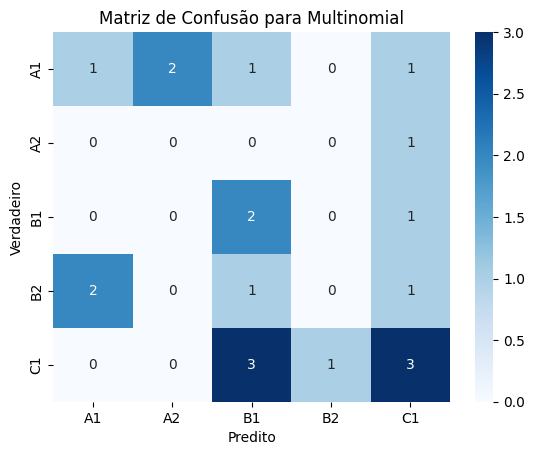

In [208]:
        # Matriz de Confusão
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1'])
        plt.title(f'Matriz de Confusão para {nome}')
        plt.ylabel('Verdadeiro')
        plt.xlabel('Predito')
        plt.show()

In [209]:
# Função de validação cruzada
from sklearn.model_selection import KFold, cross_val_score

def realizar_validacao_cruzada(modelo, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # K-Fold Cross Validation
    scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')

    # Corrigido: Acessando o nome da classe do modelo
    print(f"\nValidação Cruzada para {modelo.__class__.__name__}:")
    print(f"Precisões: {scores}")
    print(f"Média da precisão: {scores.mean():.2f}")

# Exemplo de como chamar a função
# Supondo que 'modelo', 'X_train' e 'y_train' já estejam definidos
realizar_validacao_cruzada(modelo, X_train, y_train)



Validação Cruzada para GaussianNB:
Precisões: [0.1875 0.125  0.1875 0.125  0.25  ]
Média da precisão: 0.17


In [210]:

# Função para realizar validação cruzada
def realizar_validacao_cruzada(modelo, X, y):
    """
    Função para realizar validação cruzada e obter a média da precisão.
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # K-Fold Cross Validation
    scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')
    print(f"\nValidação Cruzada para {modelo._class.name_}:")
    print(f"Precisões: {scores}")
    print(f"Média da precisão: {scores.mean():.2f}")


In [211]:
# Função para ajustar hiperparâmetros usando GridSearch
def ajuste_hiperparametros(modelo, X_train, y_train):
    """
    Função para otimizar hiperparâmetros do modelo utilizando GridSearch.
    """

In [212]:
# Definindo os parâmetros a serem ajustados
parametros = {
    'Gaussiano': {},
    'Multinomial': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Bernoulli': {
        'alpha': [0.1, 0.5, 1.0, 2.0],
        'binarize': [0.0, 0.5, 1.0]
    }
}



In [213]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV


In [214]:
# Carregar um exemplo de dados (como o conjunto Iris)
data = load_iris()
X = data.data  # Características (features)
y = data.target  # Rótulos (labels)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os parâmetros a serem ajustados
parametros = {
    'Gaussiano': {},
    'Multinomial': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Bernoulli': {
        'alpha': [0.1, 0.5, 1.0, 2.0],
        'binarize': [0.0, 0.5, 1.0]
    }
}

# Modelos
modelo = {
    'Gaussiano': GaussianNB(),
    'Multinomial': MultinomialNB(),
    'Bernoulli': BernoulliNB()
}

# Ajuste de hiperparâmetros usando GridSearchCV
for nome, modelo_atual in modelo.items():
    print(f"\nAjustando hiperparâmetros para {nome}...")
    grid_search = GridSearchCV(modelo_atual, parametros[nome], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Melhores parâmetros para {nome}: {grid_search.best_params_}")
    print(f"Melhor precisão obtida: {grid_search.best_score_:.2f}")



Ajustando hiperparâmetros para Gaussiano...
Melhores parâmetros para Gaussiano: {}
Melhor precisão obtida: 0.93

Ajustando hiperparâmetros para Multinomial...
Melhores parâmetros para Multinomial: {'alpha': 0.1}
Melhor precisão obtida: 0.92

Ajustando hiperparâmetros para Bernoulli...
Melhores parâmetros para Bernoulli: {'alpha': 0.1, 'binarize': 1.0}
Melhor precisão obtida: 0.65


In [215]:
# Supondo que X_train e y_train já estejam definidos
for nome, modelo_atual in modelo.items():
    print(f"\nAjustando hiperparâmetros para {nome}...")
    grid_search = GridSearchCV(modelo_atual, parametros[nome], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Melhores parâmetros para {nome}: {grid_search.best_params_}")
    print(f"Melhor precisão obtida: {grid_search.best_score_:.2f}")



Ajustando hiperparâmetros para Gaussiano...
Melhores parâmetros para Gaussiano: {}
Melhor precisão obtida: 0.93

Ajustando hiperparâmetros para Multinomial...
Melhores parâmetros para Multinomial: {'alpha': 0.1}
Melhor precisão obtida: 0.92

Ajustando hiperparâmetros para Bernoulli...
Melhores parâmetros para Bernoulli: {'alpha': 0.1, 'binarize': 1.0}
Melhor precisão obtida: 0.65


In [216]:
# Ajuste de hiperparâmetros usando GridSearchCV
for nome, modelo_atual in modelo.items():
    print(f"\nAjustando hiperparâmetros para {nome}...")
    grid_search = GridSearchCV(modelo_atual, parametros[nome], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Melhores parâmetros para {nome}: {grid_search.best_params_}")
    print(f"Melhor precisão obtida: {grid_search.best_score_:.2f}")

    # Melhor modelo
    melhor_modelo = grid_search.best_estimator_
    y_pred = melhor_modelo.predict(X_test)
    print(f"Precisão do melhor modelo {nome}: {accuracy_score(y_test, y_pred):.2f}")



Ajustando hiperparâmetros para Gaussiano...
Melhores parâmetros para Gaussiano: {}
Melhor precisão obtida: 0.93
Precisão do melhor modelo Gaussiano: 0.98

Ajustando hiperparâmetros para Multinomial...
Melhores parâmetros para Multinomial: {'alpha': 0.1}
Melhor precisão obtida: 0.92
Precisão do melhor modelo Multinomial: 0.96

Ajustando hiperparâmetros para Bernoulli...
Melhores parâmetros para Bernoulli: {'alpha': 0.1, 'binarize': 1.0}
Melhor precisão obtida: 0.65
Precisão do melhor modelo Bernoulli: 0.71


In [217]:
# Função principal
def main():
    """
    Função principal para executar a análise, treinamento e avaliação.
    """

In [218]:

    # Carregar os dados
    dados = carregar_dados()


In [219]:
import pandas as pd
import numpy as np

# Função para análise exploratória
def analise_exploratoria(dados):
    """
    Função para realizar uma análise exploratória básica dos dados.
    """
    print("Primeiras linhas dos dados:")
    print(dados.head())

    print("\nInformações gerais sobre os dados:")
    print(dados.info())

    print("\nEstatísticas descritivas:")
    print(dados.describe())

    print("\nVerificando valores ausentes:")
    print(dados.isnull().sum())

# Gerando dados simulados (exemplo)
tempo_estudo = np.random.normal(loc=3, scale=1, size=100)
pontuacao = np.random.normal(loc=60, scale=15, size=100)
frequencia_palavras = np.random.randint(1, 20, size=100)
niveis = np.random.choice([0, 1, 2, 3, 4], size=100)

# Criando um DataFrame com os dados simulados
dados = pd.DataFrame({
    'tempo_estudo': tempo_estudo,
    'pontuacao': pontuacao,
    'frequencia_palavras': frequencia_palavras,
    'nivel': niveis
})

# Análise Exploratória de Dados (EDA)
analise_exploratoria(dados)



Primeiras linhas dos dados:
   tempo_estudo  pontuacao  frequencia_palavras  nivel
0      3.490585  61.403440                    3      2
1      4.068944  38.584628                    8      2
2      5.753272  59.716062                    3      4
3      3.133989  70.590462                   14      1
4      5.948668  53.041268                   18      2

Informações gerais sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo_estudo         100 non-null    float64
 1   pontuacao            100 non-null    float64
 2   frequencia_palavras  100 non-null    int64  
 3   nivel                100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None

Estatísticas descritivas:
       tempo_estudo   pontuacao  frequencia_palavras       nivel
count    100.000000  100.000000           100.000000  10

In [220]:
from sklearn.model_selection import train_test_split

def pre_processar_dados(dados):
    """
    Função para pré-processar os dados.
    - Separa as variáveis explicativas (X) e a variável alvo (y).
    - Normaliza as variáveis explicativas.
    """
    # Separa as variáveis explicativas (X) e a variável alvo (y)
    X = dados.drop('nivel', axis=1)  # Exclui a coluna 'nivel' para X
    y = dados['nivel']  # A variável alvo é a coluna 'nivel'

    # Normaliza os dados (opcional, pode ser feito conforme necessário)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_normalizado = scaler.fit_transform(X)

    return X_normalizado, y

# Chamando a função para pré-processamento
X, y = pre_processar_dados(dados)


In [221]:

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def treinar_e_avaliar_modelos(X_train, X_test, y_train, y_test):
    """
    Função para treinar e avaliar os modelos.
    """
    # Aqui, você pode colocar seu código para treinar diferentes modelos
    # Por exemplo, vamos treinar um modelo de regressão logística
    from sklearn.linear_model import LogisticRegression

    # Instanciando o modelo
    modelo = LogisticRegression(max_iter=1000)

    # Treinando o modelo
    modelo.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = modelo.predict(X_test)

    # Calculando a acurácia
    acc = accuracy_score(y_test, y_pred)

    print(f"Acurácia do modelo: {acc:.2f}")


In [223]:
    print(f"Acurácia do modelo: {acc:.2f}")

Acurácia do modelo: 0.30
